In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *


In [3]:
vgg= models.vgg16_bn
#hyperparameters
batch_size = 10
epochs = 50


#Storing path
save_loc = 'vgg16model_trainedonSIPAKMEDdataset5000' + str(epochs) + "batch" + str(batch_size)

## Declaring path of dataset
path_img = Path("SIPakMed_format")

#Declaring the .pth path for the model weights
weights_path = path_img/'models2'/"vgg16modeltrainedon_DA_HERLEV_SIPAKMED95accuracy"/"vgg16model_trainedonExtendedDAdataset50batch100.001BEST"  #this needs to be of .pth extension

#Model path (.pkl) to the folder with the "export.pkl" seraialization file
model_path = path_img/'models2'/"vgg16SimplesipakmedE10B5accuracy87"   #this needs to be of .pkl extension and it needs to have the name "export.pkl"
## Loading data 
data = ImageDataBunch.from_folder(path=path_img, train='train',
            valid='val', ds_tfms=get_transforms(), size = 224, bs=batch_size)#, check_ext=False)  #the size of the input pictures is quite important
## Normalizing data based on Image net parameters
data.normalize(imagenet_stats)
#data.show_batch(rows=3, figsize=(10,8))
print(data.classes)
len(data.classes),data.c

d:\major_project\env_major_project\lib\site-packages\torch\nn\functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
d:\major_project\env_major_project\lib\site-packages\torch\nn\functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The de

['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic', 'im_Parabasal', 'im_Superficial-Intermediate']


d:\major_project\env_major_project\lib\site-packages\torch\nn\functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


(5, 5)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to C:\Users\Aditya Arora/.cache\torch\hub\checkpoints\vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,f_beta,time
0,2.025729,1.072493,0.618557,0.613371,06:30
1,1.532469,0.665466,0.752577,0.750943,06:29
2,1.207045,0.542950,0.783505,0.781357,07:03
3,0.963810,0.435277,0.845361,0.845157,06:27
4,0.695302,0.403363,0.855670,0.855838,06:10
5,0.641765,0.303106,0.907216,0.906723,06:08
6,0.585165,0.358176,0.891753,0.891309,06:06
7,0.653522,0.648230,0.855670,0.853911,06:09
8,0.522252,0.536018,0.876289,0.875682,05:56
9,0.495865,0.508107,0.855670,0.854303,05:52


Better model found at epoch 0 with accuracy value: 0.6185566782951355.
Better model found at epoch 1 with accuracy value: 0.7525773048400879.
Better model found at epoch 2 with accuracy value: 0.7835051417350769.
Better model found at epoch 3 with accuracy value: 0.8453608155250549.
Better model found at epoch 4 with accuracy value: 0.8556700944900513.
Better model found at epoch 5 with accuracy value: 0.907216489315033.
Better model found at epoch 22 with accuracy value: 0.9175257682800293.
Better model found at epoch 30 with accuracy value: 0.9278350472450256.
Better model found at epoch 31 with accuracy value: 0.9432989954948425.
Better model found at epoch 33 with accuracy value: 0.9587628841400146.


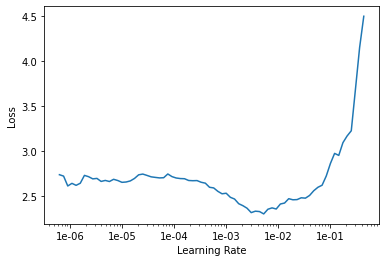

In [4]:
#make sure you are using a gpu
defaults.device = torch.device('cuda')


trans_model= cnn_learner(data, models.vgg16_bn, metrics=[accuracy,FBeta(average="weighted")])



trans_model.unfreeze()


trans_model.lr_find()
trans_model.recorder.plot()
#Train again
trans_model.fit_one_cycle(epochs,callbacks=[SaveModelCallback(trans_model, every='improvement', mode = 'max', monitor='accuracy', name=save_loc)])


trans_model.save(save_loc)
trans_model.export()